#### Import Libraries

In [111]:
# Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.precision',3)
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

# Visualization
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from sklearn import set_config
set_config(display='text') #estimators now will be displayed in text, the default is diagrams
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from itertools import islice
# Deep Learning
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [ ]:
stock = files.upload()
########
# Another way to get these dataset is

In [203]:
# import yfinance as yf
# nifty50 = yf.download("^NSEI", start="2015-01-01", end="2024-12-13")
# nifty50.head(10)

In [193]:
stock = pd.read_csv('NIFTY50_all.csv', na_values=['?', 'NA', 'null', ''])
pd.set_option('display.max_columns', None)
stock.head(10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.00,962.90,984.72,27294366,2.688e+15,NaN,9.860e+06,0.361
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.00,893.90,941.38,4581338,4.313e+14,NaN,1.453e+06,0.317
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.00,884.20,888.09,5124121,4.551e+14,NaN,1.070e+06,0.209
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.00,921.55,929.17,4609762,4.283e+14,NaN,1.261e+06,0.274
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.00,969.30,965.65,2977470,2.875e+14,NaN,8.161e+05,0.274
5,2007-12-04,MUNDRAPORT,EQ,969.30,985.00,1056.00,976.0,1049.00,1041.45,1015.39,4849250,4.924e+14,NaN,1.538e+06,0.317
6,2007-12-05,MUNDRAPORT,EQ,1041.45,1061.00,1099.50,1050.0,1084.00,1082.45,1082.79,2848209,3.084e+14,NaN,9.043e+05,0.318
7,2007-12-06,MUNDRAPORT,EQ,1082.45,1089.00,1109.70,1051.0,1090.10,1081.30,1087.03,1749516,1.902e+14,NaN,8.257e+05,0.472
8,2007-12-07,MUNDRAPORT,EQ,1081.30,1100.00,1134.00,1078.0,1100.00,1102.40,1106.57,2247904,2.487e+14,NaN,6.978e+05,0.310
9,2007-12-10,MUNDRAPORT,EQ,1102.40,1110.00,1110.00,1061.1,1073.55,1075.40,1080.38,1012350,1.094e+14,NaN,4.175e+05,0.412


In [194]:
stock.head(10)
stock['Date'] = pd.to_datetime(stock['Date'])
stock['Date'] = stock['Date'].dt.date

In [187]:
symbol = stock['Symbol'].unique()

In [195]:
df_dict = {symbol: group for symbol, group in stock.groupby('Symbol')}
df_dict['ASIANPAINT'].head(10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3322,2000-01-03,ASIANPAINT,EQ,361.20,370.0,390.00,370.00,385.00,381.65,380.54,3318,1.263e+11,NaN,NaN,NaN
3323,2000-01-04,ASIANPAINT,EQ,381.65,380.0,392.00,375.00,390.00,385.55,383.50,4818,1.848e+11,NaN,NaN,NaN
3324,2000-01-05,ASIANPAINT,EQ,385.55,371.5,390.00,371.50,383.00,383.00,379.81,2628,9.981e+10,NaN,NaN,NaN
3325,2000-01-06,ASIANPAINT,EQ,383.00,384.9,384.90,374.50,375.10,377.50,379.88,3354,1.274e+11,NaN,NaN,NaN
3326,2000-01-07,ASIANPAINT,EQ,377.50,376.0,390.00,370.00,389.00,385.70,383.38,9589,3.676e+11,NaN,NaN,NaN
3327,2000-01-10,ASIANPAINT,EQ,385.70,415.0,416.60,409.00,416.60,415.00,414.97,60313,2.503e+12,NaN,NaN,NaN
3328,2000-01-11,ASIANPAINT,EQ,415.00,415.0,423.00,409.00,417.00,415.20,412.51,65570,2.705e+12,NaN,NaN,NaN
3329,2000-01-12,ASIANPAINT,EQ,415.20,420.0,448.45,410.05,418.55,417.65,421.46,24854,1.048e+12,NaN,NaN,NaN
3330,2000-01-13,ASIANPAINT,EQ,417.65,423.0,429.90,413.05,417.10,418.70,422.40,9169,3.873e+11,NaN,NaN,NaN
3331,2000-01-14,ASIANPAINT,EQ,418.70,410.0,414.90,408.00,410.60,410.00,410.05,64603,2.649e+12,NaN,NaN,NaN


#### Plot the dataset first so we can see how big the data

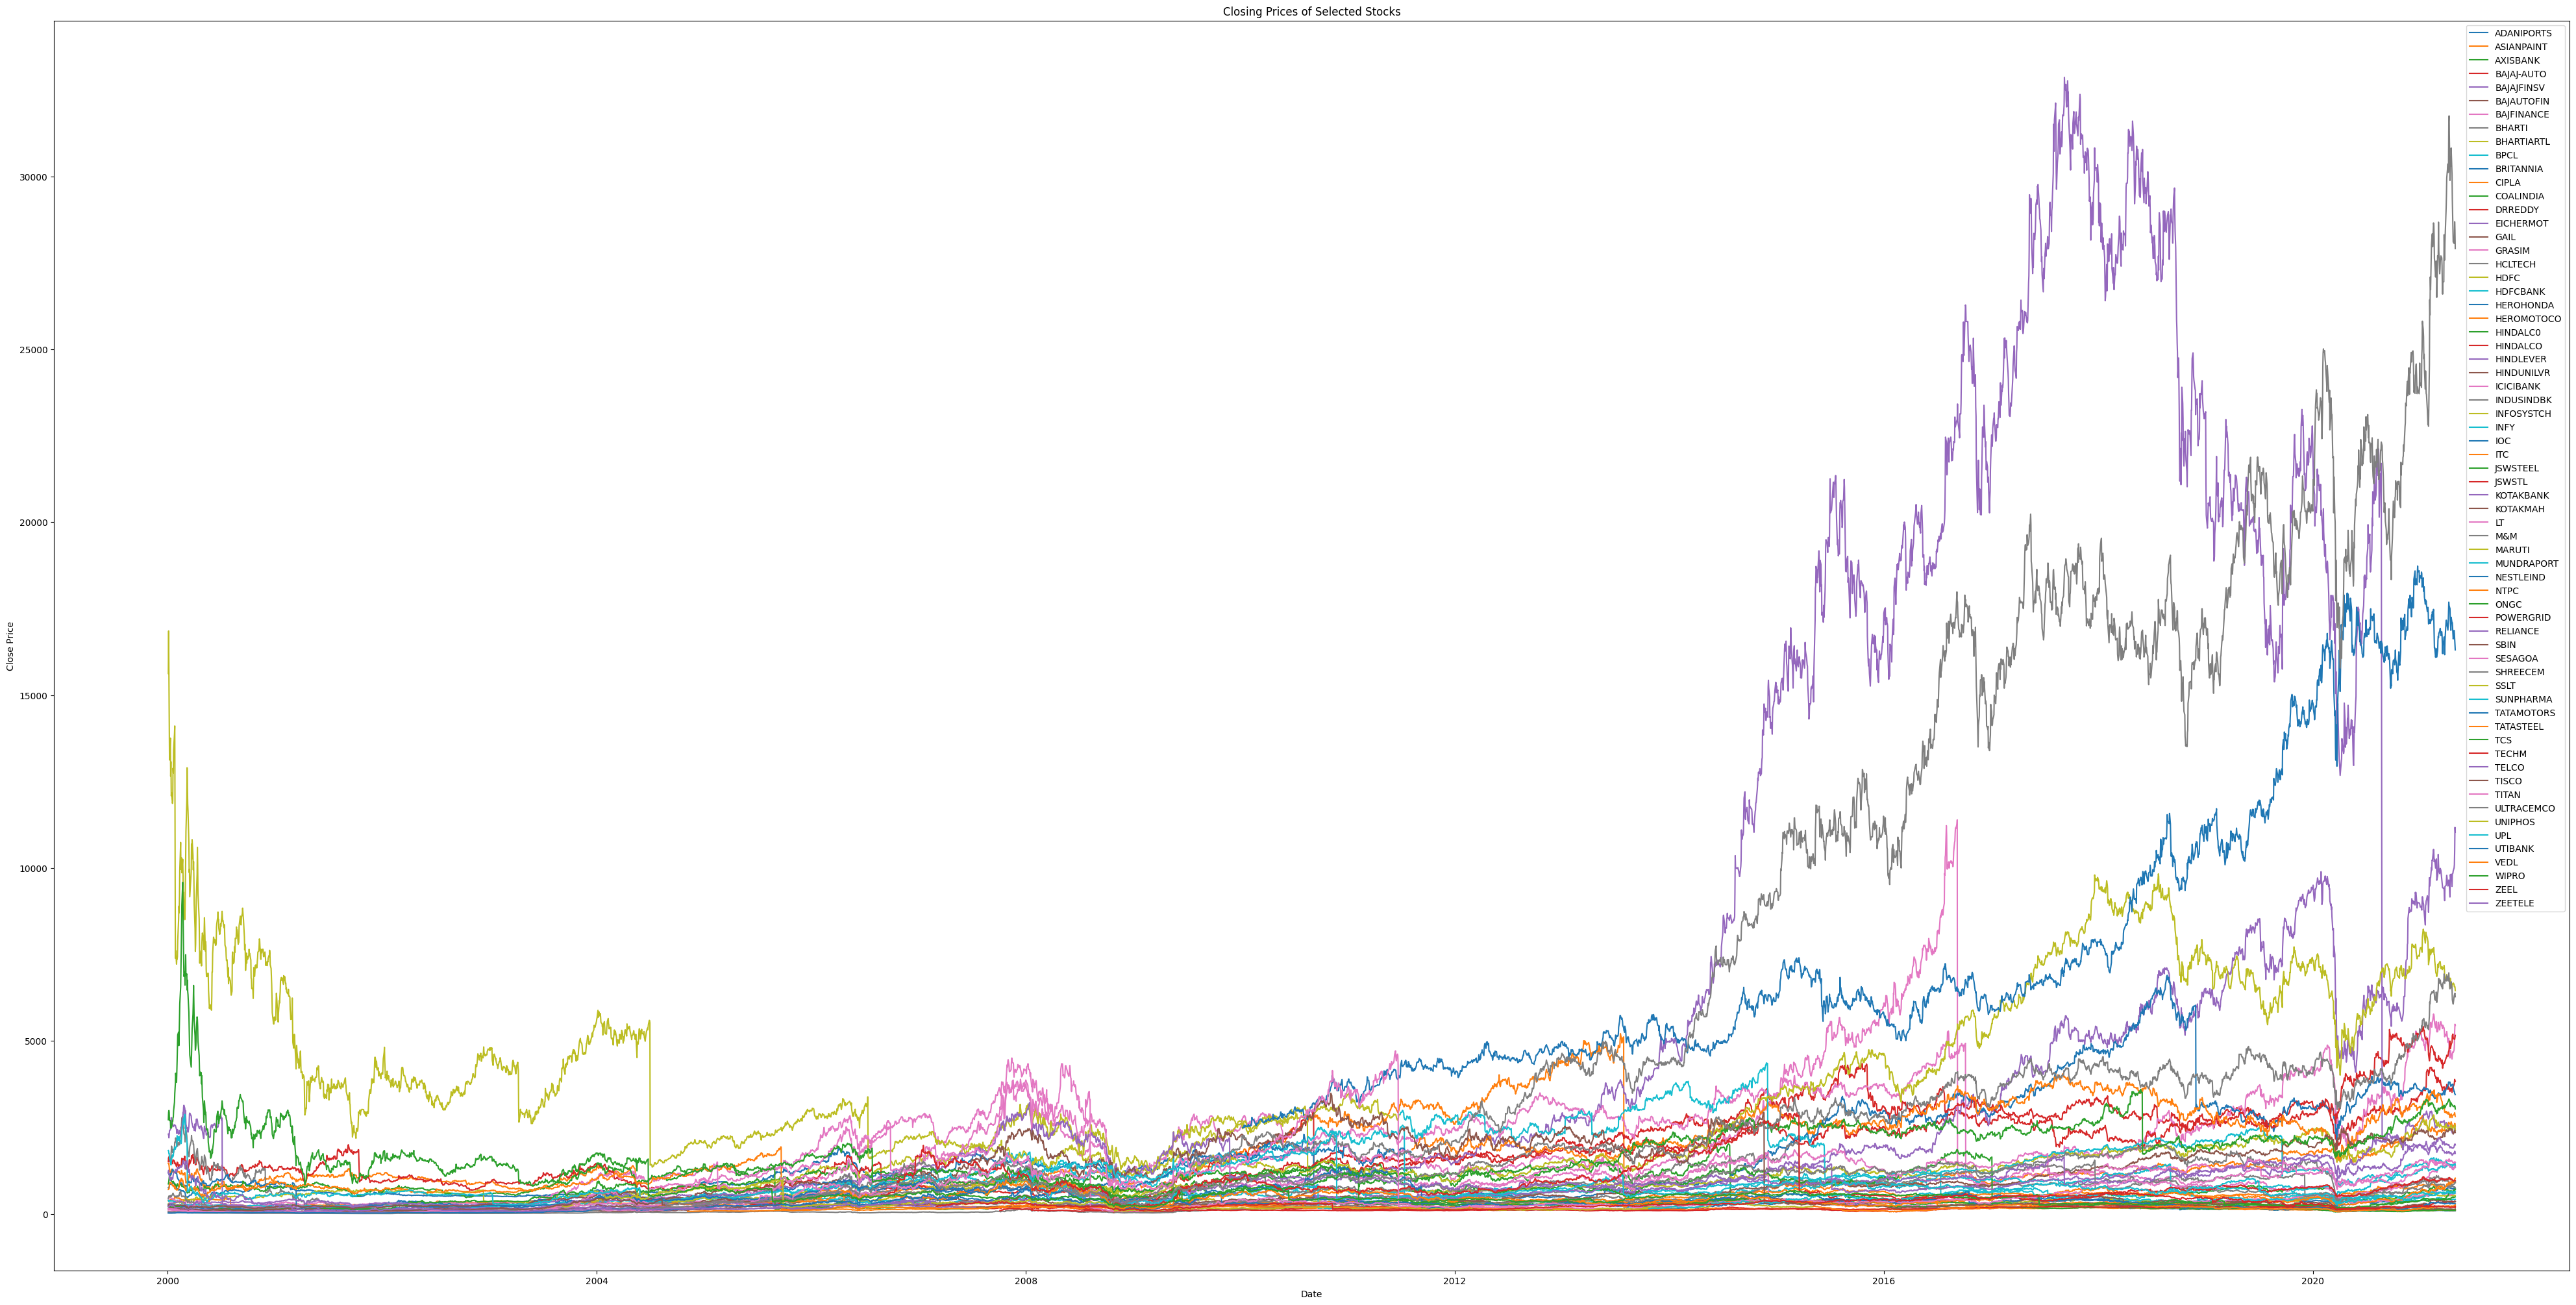

In [189]:
plt.figure(figsize=(50, 25))
for symbol, group in df_dict.items():
    plt.plot(group['Date'], group['Close'], label=symbol)
plt.title('Closing Prices of Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

#### Now move to a smaller example of it

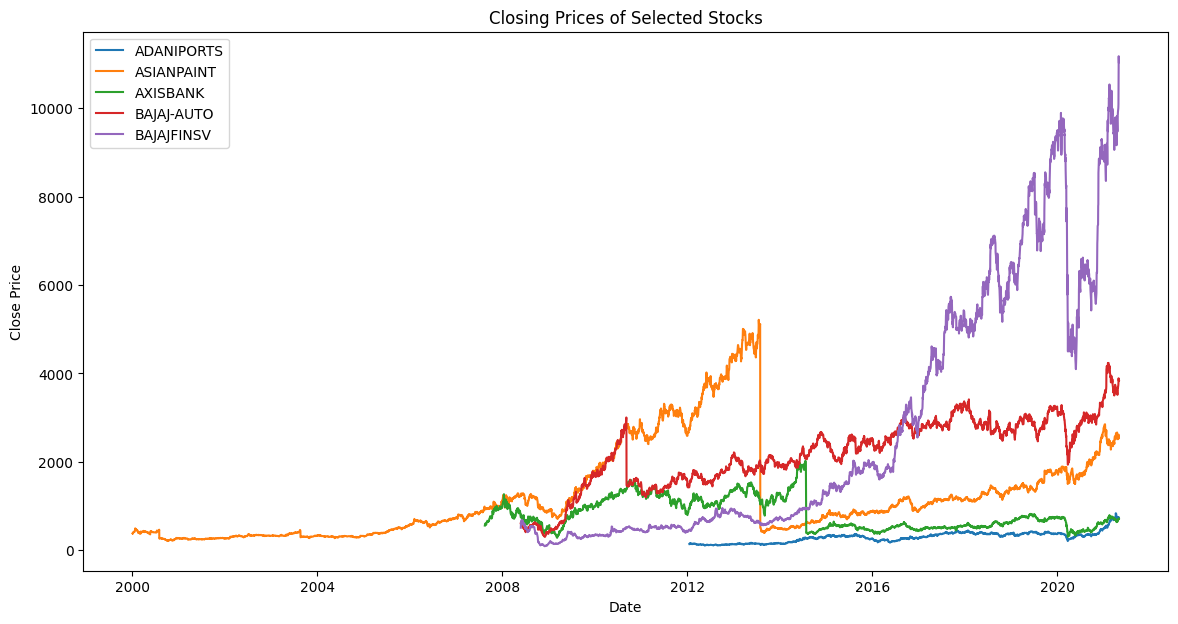

In [190]:
plt.figure(figsize=(14, 7))
for symbol, group in islice(df_dict.items(), 5):
    plt.plot(group['Date'], group['Close'], label=symbol)
plt.title('Closing Prices of Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

#### RNN

##### Just choose 1 in the whole dataset then analyze it

In [215]:
df = df_dict['ASIANPAINT']
df.drop(columns=['Symbol', 'Series'], inplace=True)
df.head(10)
# solve datetime
# df['datetime'] = pd.to_datetime(df['Date']).astype(np.int64)
# df.drop(columns=['Date'], inplace=True)
df.head(10)

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3322,2000-01-03,361.20,370.0,390.00,370.00,385.00,381.65,380.54,3318,1.263e+11,NaN,NaN,NaN
3323,2000-01-04,381.65,380.0,392.00,375.00,390.00,385.55,383.50,4818,1.848e+11,NaN,NaN,NaN
3324,2000-01-05,385.55,371.5,390.00,371.50,383.00,383.00,379.81,2628,9.981e+10,NaN,NaN,NaN
3325,2000-01-06,383.00,384.9,384.90,374.50,375.10,377.50,379.88,3354,1.274e+11,NaN,NaN,NaN
3326,2000-01-07,377.50,376.0,390.00,370.00,389.00,385.70,383.38,9589,3.676e+11,NaN,NaN,NaN
3327,2000-01-10,385.70,415.0,416.60,409.00,416.60,415.00,414.97,60313,2.503e+12,NaN,NaN,NaN
3328,2000-01-11,415.00,415.0,423.00,409.00,417.00,415.20,412.51,65570,2.705e+12,NaN,NaN,NaN
3329,2000-01-12,415.20,420.0,448.45,410.05,418.55,417.65,421.46,24854,1.048e+12,NaN,NaN,NaN
3330,2000-01-13,417.65,423.0,429.90,413.05,417.10,418.70,422.40,9169,3.873e+11,NaN,NaN,NaN
3331,2000-01-14,418.70,410.0,414.90,408.00,410.60,410.00,410.05,64603,2.649e+12,NaN,NaN,NaN


In [160]:
df.columns

Index(['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume',
       'Turnover', 'Deliverable Volume', '%Deliverble', 'datetime'],
      dtype='object')

##### PCA

In [214]:
columns_to_use = ['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover']

df_pca = df[columns_to_use]

# Normalized the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca)
df_scaled = pd.DataFrame(df_scaled, columns=columns_to_use)
df_scaled.head(10)
# # Applying PCA
pca = PCA(n_components=0.95)  # Keep 95%
df_pca = pca.fit_transform(df_scaled)
print(f"Số lượng thành phần chính: {df_pca.shape[1]}")

Số lượng thành phần chính: 2


In [207]:
series = df['Close'].values.reshape(-1,1)

In [208]:
# Normalized the data
scaler = StandardScaler()
scaler.fit(series[:len(series)//2])
series = scaler.transform(series).flatten()

In [209]:
T = 30
D = 1
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y).reshape(-1,1)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (5276, 30, 1) Y.shape (5276, 1)


In [216]:
class RNN(nn.Module) :
  def __init__(self, n_inputs, n_hidden, n_rnnlayers, n_outputs) :
    super(RNN, self).__init__()
    self.D = n_inputs
    self.M = n_hidden
    self.K = n_outputs
    self.L = n_rnnlayers
    self.rnn = nn.LSTM(
        input_size = self.D,
        hidden_size = self.M,
        num_layers = self.L,
        batch_first = True)
    self.fc = nn.Linear(self.M, self.K)
  def forward(self, X) :
    h0 = torch.zeros(self.L, X.size(0), self.M).to(device)
    c0 = torch.zeros(self.L, X.size(0), self.M).to(device)
    out, _ = self.rnn(X, (h0, c0))
    out = self.fc(out[:, -1, :])
    return out

In [251]:
model=RNN(1,64,2,1)

In [252]:
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

cuda:0


RNN(
  (rnn): LSTM(1, 64, num_layers=2, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [253]:
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(), lr=0.1)

In [254]:
def full_gd(
    model,
    criterion,
    optimizer,
    X_train,
    y_train,
    X_test,
    y_test,
    epochs=200):

  #stuff to store
  train_losses=np.zeros(epochs)
  test_losses=np.zeros(epochs)

  for it in range(epochs):
    #zero the param gradients
    optimizer.zero_grad()

    #forward pass
    outputs=model(X_train)
    loss=criterion(outputs,y_train)

    #backward and optimize
    loss.backward()
    optimizer.step()

    #save losses
    train_losses[it]=loss.item()

    #test loss
    test_outputs=model(X_test)
    test_loss=criterion(test_outputs,y_test)
    test_losses[it]=test_loss.item()

    if (it+1) % 5 == 0:
      print(f"Epoch {it+1}/{epochs}, Train loss:{loss.item():.4f},test loss:{test_loss.item():.4f}")

  return train_losses, test_losses

In [255]:
X_train=torch.from_numpy(X[:-N//2].astype(np.float32))
y_train=torch.from_numpy(Y[:-N//2].astype(np.float32))
X_test=torch.from_numpy(X[N//2:].astype(np.float32))
y_test=torch.from_numpy(Y[-N//2:].astype(np.float32))

In [256]:
X_train, y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

In [257]:
train_losses,test_losses= full_gd(
    model,
    criterion,
    optimizer,
    X_train,
    y_train,
    X_test,
    y_test)

Epoch 5/200, Train loss:2.4999,test loss:17.3018
Epoch 10/200, Train loss:0.4245,test loss:4.2873
Epoch 15/200, Train loss:0.3884,test loss:4.7730
Epoch 20/200, Train loss:0.3889,test loss:5.3737
Epoch 25/200, Train loss:0.4302,test loss:5.3342
Epoch 30/200, Train loss:0.4219,test loss:6.9988
Epoch 35/200, Train loss:0.4028,test loss:6.2321
Epoch 40/200, Train loss:0.4328,test loss:6.9713
Epoch 45/200, Train loss:0.4224,test loss:6.8055
Epoch 50/200, Train loss:0.3558,test loss:5.6370
Epoch 55/200, Train loss:0.3496,test loss:5.7715
Epoch 60/200, Train loss:0.2979,test loss:4.9401
Epoch 65/200, Train loss:0.2050,test loss:4.8624
Epoch 70/200, Train loss:0.1300,test loss:3.6965
Epoch 75/200, Train loss:0.1179,test loss:3.2334
Epoch 80/200, Train loss:0.0810,test loss:3.2308
Epoch 85/200, Train loss:0.0853,test loss:2.9108
Epoch 90/200, Train loss:0.0581,test loss:2.9959
Epoch 95/200, Train loss:0.0529,test loss:2.8159
Epoch 100/200, Train loss:0.1009,test loss:2.2759
Epoch 105/200, Trai

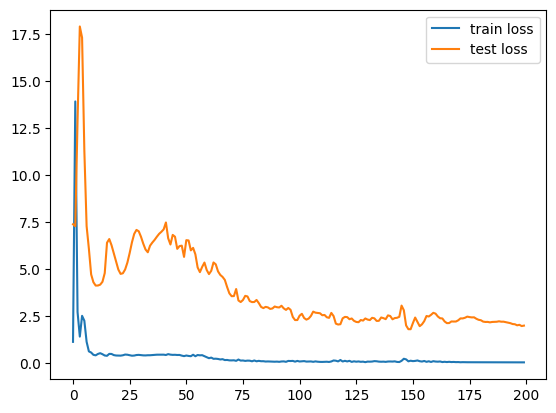

In [258]:
plt.plot(train_losses, label='train loss')
plt.plot(test_losses,label='test loss')
plt.legend()
plt.show()

In [259]:
#obtain one step forecast using true targets
validation_target=Y
validation_predictions=[]

#index of first validation input
i=0

X_on_device=torch.from_numpy(X.astype(np.float32)).to(device)

while len(validation_predictions) < len(validation_target):
  input_=X_on_device[i].reshape(1,T,1)
  p=model(input_)[0,0].item() #1x1 array ->scalar
  i +=1

  #update the predictioons list
  validation_predictions.append(p)


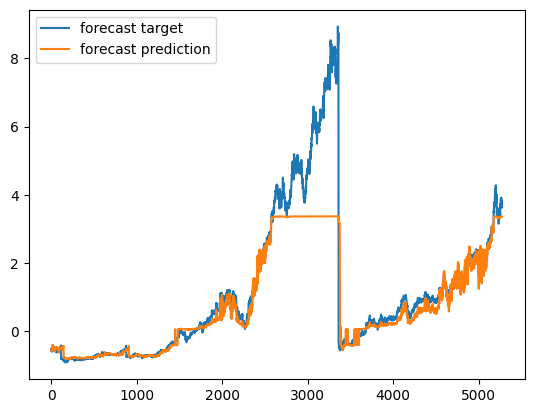

In [260]:
plt.plot(validation_target,label='forecast target')
plt.plot(validation_predictions,label='forecast prediction')
plt.legend()

In [242]:
#multi step-forecast
validation_target=Y[-N//2:]
validation_predictions=[]

In [243]:
N/2 , N//2

(2638.0, 2638)

In [244]:
last_x=X_test[0].view(T)

while len(validation_predictions) < len(validation_target):
  input_=last_x.reshape(1,T,1)
  p=model(input_)

  #[0,0] #1x1 array->scalar

  #update prediction list
  validation_predictions.append(p[0,0].item())

  #make new input
  last_x=torch.cat((last_x[1:],p[0]))

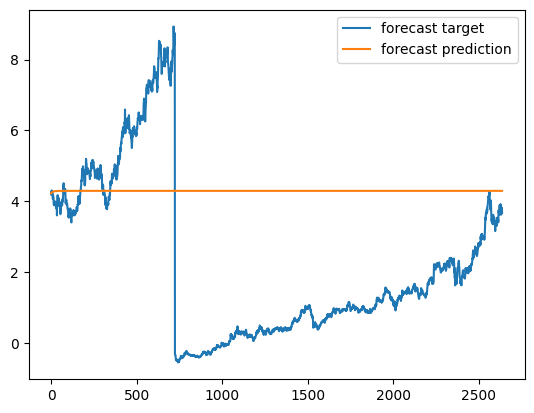

In [245]:
plt.plot(validation_target,label='forecast target')
plt.plot(validation_predictions,label='forecast prediction')
plt.legend()

In [250]:
# #get accuracy
# with torch.no_grad():
#   p_train=model(X_train)
#   p_train=(p_train.cpu().numpy()>0)
#   train_acc=np.mean(y_train.cpu().numpy()==p_train)

#   p_test=model(X_test)
#   p_test=(p_test.cpu().numpy()>0)
#   test_acc=np.mean(y_test.cpu().numpy()==p_test)

# print(f"train acc {train_acc:.4f}, test acc: {test_acc:.4f}")